In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
CV = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18aalataf_20220602\\detections_ZTF18aalataf.csv")
CV

,tid,mjd,candid,fid,pid,diffmaglim,isdiffpos,nid,distnr,magpsf,...,magapbig,sigmagapbig,rfid,has_stamp,corrected,dubious,candid_alert,step_id_corr,phase,parent_candid
0,ztf,58281.362766,527362764415010003,2,527362764415,20.755400,-1,527,0.158319,20.644500,...,20.5773,0.4149,NaN,False,True,False,NaN,bulk_1.0.0,0,5.363639e+17
1,ztf,58290.363900,536363904415010002,2,536363904415,20.729704,-1,536,0.114301,20.403970,...,20.9345,0.5788,726120244.0,True,True,False,NaN,bulk_1.0.0,0,0.000000e+00
2,ztf,58355.269236,601269234415010002,2,601269234415,20.132100,-1,601,0.110200,20.427500,...,19.7420,0.3633,NaN,False,True,False,NaN,bulk_1.0.0,0,6.161611e+17
3,ztf,58364.177407,610177404415010008,2,610177404415,20.828500,-1,610,0.236050,20.413100,...,20.3354,0.3065,NaN,False,True,False,NaN,bulk_1.0.0,0,6.161611e+17
4,ztf,58370.161134,616161134415010005,2,616161134415,20.581722,-1,616,0.149289,20.503181,...,19.9788,0.2610,726120244.0,True,True,False,NaN,bulk_1.0.0,0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,ztf,59693.477338,1939477334415015012,1,1939477334415,20.271706,1,1939,0.504927,17.581766,...,17.6146,0.0372,726120144.0,True,True,False,NaN,correction_1.0.6,0,NaN
114,ztf,59696.432604,1942432604415015022,1,1942432604415,20.676702,1,1942,0.486569,18.071795,...,18.0707,0.0413,726120144.0,True,True,False,NaN,correction_1.0.6,0,NaN
115,ztf,59696.457350,1942457344415015014,2,1942457344415,20.560253,1,1942,0.308494,18.452496,...,18.4490,0.0649,726120244.0,True,True,False,NaN,correction_1.0.6,0,NaN
116,ztf,59698.412558,1944412554415015013,2,1944412554415,20.506649,1,1944,0.400150,19.938970,...,19.9968,0.2847,726120244.0,True,True,False,NaN,correction_1.0.6,0,NaN


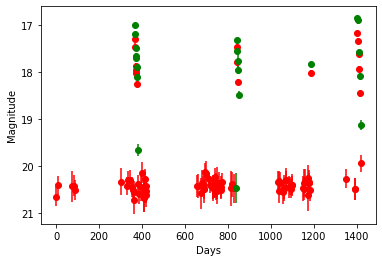

In [46]:
red_points = CV['fid']==2
green_points = CV['fid']==1
plt.errorbar(CV['mjd'][red_points]-CV['mjd'][0], CV['magpsf'][red_points], CV['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(CV['mjd'][green_points]-CV['mjd'][0], CV['magpsf'][green_points], CV['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

<Figure size 900x600 with 0 Axes>

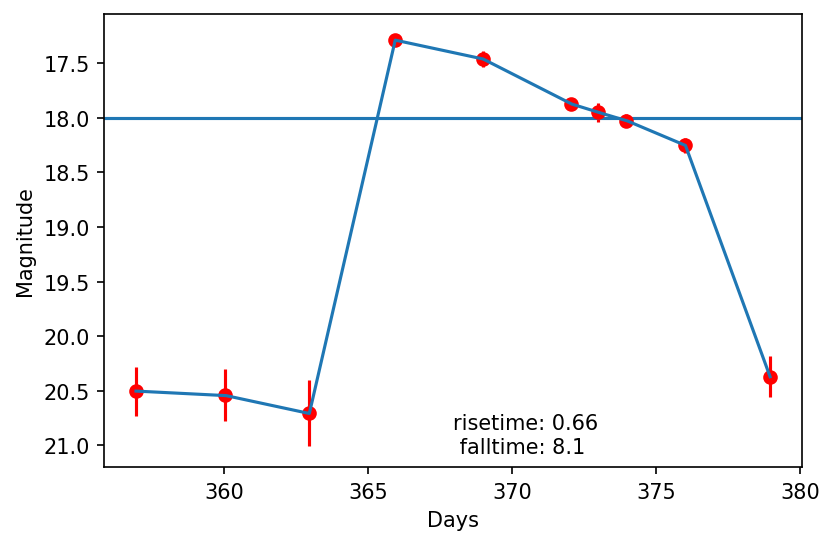

In [47]:
# Working on first peak with red filter

red_points = CV['fid']==2
green_points = CV['fid']==1
x_vals = CV['mjd'][red_points]-CV['mjd'][0]

y_vals = CV['magpsf'][red_points]
y_error = CV['sigmapsf'][red_points]

#defining first peak
start = 10
finish = 20
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
magdiff = 2.5 * np.log10(2)
minmag_index = int(np.argwhere(y_vals == minmag))

mintime = x_vals[minmag_index]
halfmag = minmag + magdiff
#print(f"minmag {minmag}")
#print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
good_xvals = np.array([])
for i, xval in enumerate(x_interp):
    if np.abs(y_interp[i] - halfmag) < 0.05:
        good_xvals = np.append(good_xvals, xval)

#print(good_xvals)

half_rising_JD = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
half_falling_JD = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])

risetime = mintime - half_rising_JD
falltime = half_falling_JD - mintime

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
fig, ax = plt.subplots(dpi=150)
plt.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
plt.axhline(18)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
plt.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax.text(np.average([np.max(x_vals), np.min(x_vals)]), np.max(y_vals), textstr, verticalalignment = 'top')
plt.show()

In [48]:
# green points
#plt.errorbar(CV['mjd'][green_points]-CV['mjd'][0], CV['magpsf'][green_points], CV['sigmapsf'][green_points], c='green', fmt='o'